### Import Modul-Modul yang Diperlukan

In [1]:
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import statistics
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli, shapiro, normaltest

# Seaborn Config
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (5, 5)})

### Read Data CSV

In [2]:
df_newyork=pd.read_csv('dataset/nyc-rolling-sales.csv')

In [3]:
df_newyork.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df_newyork.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
type(df_newyork)

pandas.core.frame.DataFrame

In [6]:
with pd.option_context("display.max.columns", None):
    df_newyork.head(10)
    display (df_newyork.head(10))

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


## Drop Kolom Unnamed & Ease-Ment

In [7]:
df_newyork.drop(columns=["Unnamed: 0", 'EASE-MENT'], inplace=True)

In [8]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [9]:
df_newyork.shape

(84548, 20)

In [10]:
print('Column Name')
for col in df_newyork.columns:
    if df_newyork[col].dtype=='object':
        print(col, df_newyork[col].nunique())

Column Name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [11]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_newyork[col] = pd.to_numeric(df_newyork[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_newyork[col] = df_newyork[col].astype('category')

df_newyork['SALE DATE'] = pd.to_datetime(df_newyork['SALE DATE'], errors='coerce')
numer, categ

(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH'],
 ['NEIGHBORHOOD',
  'BUILDING CLASS CATEGORY',
  'TAX CLASS AT PRESENT',
  'BUILDING CLASS AT PRESENT',
  'BUILDING CLASS AT TIME OF SALE',
  'TAX CLASS AT TIME OF SALE'])

In [12]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [13]:
df_newyork.isnull().sum()/len(df_newyork)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

In [14]:
missing = df_newyork.isnull().sum()/len(df_newyork)*100
print(pd.DataFrame([missing[missing>0],pd.Series(df_newyork.isnull().sum()[df_newyork.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [15]:
print(df_newyork[(df_newyork['LAND SQUARE FEET'].isnull()) & (df_newyork['GROSS SQUARE FEET'].notnull())].shape)
print(df_newyork[(df_newyork['LAND SQUARE FEET'].notnull()) & (df_newyork['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [16]:
df_newyork['LAND SQUARE FEET'] = df_newyork['LAND SQUARE FEET'].mask((df_newyork['LAND SQUARE FEET'].isnull()) & (df_newyork['GROSS SQUARE FEET'].notnull()), df_newyork['GROSS SQUARE FEET'])
df_newyork['GROSS SQUARE FEET'] = df_newyork['GROSS SQUARE FEET'].mask((df_newyork['LAND SQUARE FEET'].notnull()) & (df_newyork['GROSS SQUARE FEET'].isnull()), df_newyork['LAND SQUARE FEET'])

In [17]:
print(sum(df_newyork.duplicated()))
df_newyork[df_newyork.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [18]:
df_newyork.drop_duplicates(inplace=True)
print(sum(df_newyork.duplicated()))

0


In [19]:
df_newyork.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,83783.0,2.999308e+00,1.288668e+00,1.0,2.0,3.0,4.0,5.000000e+00
BLOCK,83783.0,4.242903e+03,3.568789e+03,1.0,1326.0,3319.0,6295.0,1.632200e+04
LOT,83783.0,3.761374e+02,6.580213e+02,1.0,22.0,50.0,1001.0,9.106000e+03
ZIP CODE,83783.0,1.073324e+04,1.289764e+03,0.0,10305.0,11209.0,11357.0,1.169400e+04
RESIDENTIAL UNITS,83783.0,1.999976e+00,1.656912e+01,0.0,0.0,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,83783.0,1.836769e-01,8.576582e+00,0.0,0.0,0.0,0.0,2.261000e+03
TOTAL UNITS,83783.0,2.213504e+00,1.877773e+01,0.0,1.0,1.0,2.0,2.261000e+03
LAND SQUARE FEET,57734.0,3.857326e+03,4.154676e+04,0.0,1643.0,2315.0,3500.0,4.252327e+06
GROSS SQUARE FEET,57734.0,4.206654e+03,4.209695e+04,0.0,1056.0,1700.0,2600.0,4.252327e+06
YEAR BUILT,83783.0,1.789814e+03,5.365651e+02,0.0,1920.0,1940.0,1965.0,2.017000e+03


In [20]:
df_newyork.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

## Describe Commercial Units

In [21]:
df_newyork[df_newyork['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


## Describe Residential Units

In [22]:
df_newyork[df_newyork['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


## Menghitung Jumlah Total Units Per Borough

In [23]:
total_units_mnht = df_newyork[(df_newyork['BOROUGH'] == 1)]['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in Manhattan:', total_units_mnht)

Total Property Units Has Been Sold in Manhattan: 47015


In [24]:
total_units_brnx = df_newyork[(df_newyork['BOROUGH'] == 2)]['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in Bronx:', total_units_brnx)

Total Property Units Has Been Sold in Bronx: 24550


In [25]:
total_units_brkl = df_newyork[(df_newyork['BOROUGH'] == 3)]['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in Brooklyn:', total_units_brkl)

Total Property Units Has Been Sold in Brooklyn: 52317


In [26]:
total_units_quen = df_newyork[(df_newyork['BOROUGH'] == 4)]['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in Queens:', total_units_quen)

Total Property Units Has Been Sold in Queens: 50678


In [27]:
total_units_stis = df_newyork[(df_newyork['BOROUGH'] == 5)]['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in Staten Island:', total_units_stis)

Total Property Units Has Been Sold in Staten Island: 10894


In [28]:
total_units_newyork=df_newyork['TOTAL UNITS'].sum()
print('Total Property Units Has Been Sold in New York:', total_units_newyork)

Total Property Units Has Been Sold in New York: 185454


In [29]:
total_units_ny_alt=total_units_mnht + total_units_brnx + total_units_brkl + total_units_quen + total_units_stis
print('Total Property Units Has Been Sold in New York:', total_units_ny_alt)

Total Property Units Has Been Sold in New York: 185454


## Menghitung Jumlah Total per Borough

In [61]:
total_boro_mnht = df_newyork[(df_newyork['BOROUGH'] == 1)]['BOROUGH'].value_counts()
print('Manhattan Borough:', total_boro_mnht)

Manhattan Borough: 1    18102
Name: BOROUGH, dtype: int64


In [31]:
total_boro_brnx = df_newyork[(df_newyork['BOROUGH'] == 2)]['BOROUGH'].value_counts()
print('Bronx Borough:', total_boro_brnx)

Bronx Borough: 2    6994
Name: BOROUGH, dtype: int64


In [32]:
total_boro_brkl = df_newyork[(df_newyork['BOROUGH'] == 3)]['BOROUGH'].value_counts()
print('Brooklyn Borough:', total_boro_brkl)

Brooklyn Borough: 3    23843
Name: BOROUGH, dtype: int64


In [33]:
total_boro_quen = df_newyork[(df_newyork['BOROUGH'] == 4)]['BOROUGH'].value_counts()
print('Queens Borough:', total_boro_quen)

Queens Borough: 4    26548
Name: BOROUGH, dtype: int64


In [34]:
total_boro_stis = df_newyork[(df_newyork['BOROUGH'] == 5)]['BOROUGH'].value_counts()
print('Staten Island Borough:', total_boro_stis)

Staten Island Borough: 5    8296
Name: BOROUGH, dtype: int64


In [35]:
dfny_totbrg=df_newyork['BOROUGH'].value_counts()
dfny_totbrg.sort_values(ascending=False)

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

## Mean Total Unit

In [36]:
mean = df_newyork.groupby(['BOROUGH'])['TOTAL UNITS'].mean()
mean

BOROUGH
1    2.597227
2    3.510152
3    2.194229
4    1.908920
5    1.313163
Name: TOTAL UNITS, dtype: float64

In [37]:
median = df_newyork.groupby(['BOROUGH'])['TOTAL UNITS'].median()
median

BOROUGH
1    1
2    1
3    1
4    1
5    1
Name: TOTAL UNITS, dtype: int64

In [38]:
mode = df_newyork.groupby(['BOROUGH'])['TOTAL UNITS'].apply(lambda x: x.mode())
mode

BOROUGH   
1        0    1
2        0    1
3        0    1
4        0    1
5        0    1
Name: TOTAL UNITS, dtype: int64

In [39]:
manhattan_data = df_newyork.loc[df_newyork['BOROUGH'] == 1]
manhattan_data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [40]:
manhattan_units_ru = manhattan_data[['RESIDENTIAL UNITS']]
manhattan_units_ru

,RESIDENTIAL UNITS
0,5
1,28
2,16
3,10
4,6
...,...
18301,0
18302,0
18303,0
18304,0


In [41]:
manhattan_units_cu = manhattan_data[['COMMERCIAL UNITS']]
manhattan_units_cu

,COMMERCIAL UNITS
0,0
1,3
2,1
3,0
4,0
...,...
18301,1
18302,0
18303,1
18304,1


In [42]:
manhattan_units_total = manhattan_data[['TOTAL UNITS']]
manhattan_units_total

,TOTAL UNITS
0,5
1,31
2,17
3,10
4,6
...,...
18301,1
18302,0
18303,1
18304,1


In [43]:
mnht_units_ru_arr = np.array(manhattan_units_ru)
mnht_units_ru_arr

array([[ 5],
       [28],
       [16],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [44]:
mnht_units_cu_arr = np.array(manhattan_units_cu)
mnht_units_cu_arr

array([[0],
       [3],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [45]:
mnht_units_total_arr = np.array(manhattan_units_total)
mnht_units_total_arr

array([[ 5],
       [31],
       [17],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

## Z-Score Calculation

In [46]:
scipy.stats.zscore(mnht_units_total_arr)

array([[ 0.1031998 ],
       [ 1.21990732],
       [ 0.61860327],
       ...,
       [-0.06860135],
       [-0.06860135],
       [-0.06860135]])

## Probability Mass Function Plot

C:\Users\Chidi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


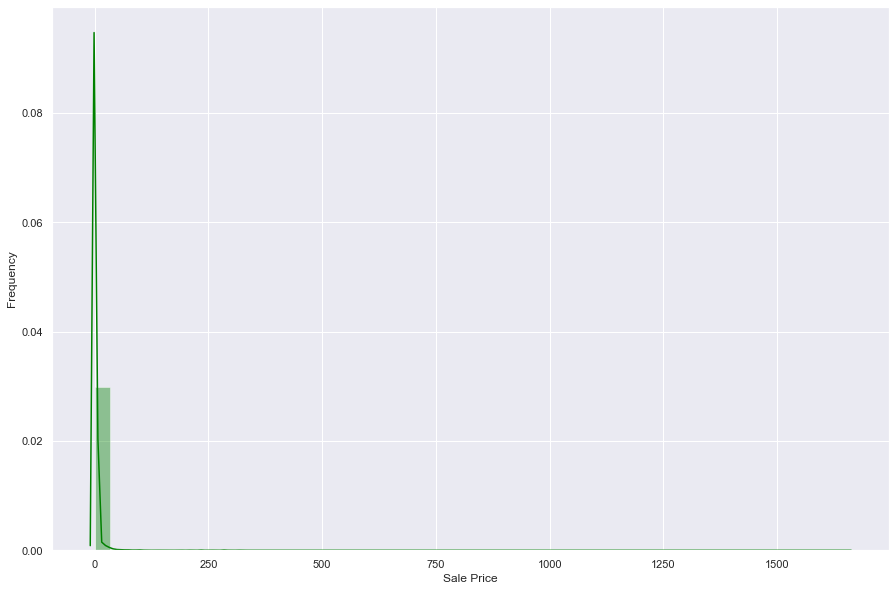

In [47]:
plt.figure(figsize=(15,10))

sns.distplot(mnht_units_total_arr, kde=True, color='green')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Confidence Interval

In [48]:
mnht_units_total_arr.mean(), mnht_units_total_arr.std(), mnht_units_total_arr.size

(2.5972268257651088, 23.282730433698575, 18102)

In [57]:
df_newyork["REGION"] = df_newyork.BOROUGH.replace(
    {1: "Manhattan",
     2: "Bronx",
     3: "Brooklyn",
     4: "Queens",
     5: "Staten Island"
    }
)
df_newyork.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,REGION
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,Manhattan


In [58]:
df_newyork.groupby('REGION').agg({'TOTAL UNITS': [np.mean, np.std, np.size]})

TOTAL UNITS                  
                     mean        std   size
REGION                                     
Bronx            3.510152  22.681594   6994
Brooklyn         2.194229   8.707408  23843
Manhattan        2.597227  23.283374  18102
Queens           1.908920  23.147488  26548
Staten Island    1.313163   3.027469   8296

In [51]:
mean_total_units_mnht = 2.5972268257651088
std_total_units_mnht = 23.282730433698575
n_mnht = 18102
z=1.96

mnht_stderr_mean = std_total_units_mnht / np.sqrt(n_mnht)
print('standard error of mean:', mnht_stderr_mean)

standard error of mean: 0.17304961191224422


In [52]:
def compute_confint(estimate, stderr, z_score=1.96):
    return(
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [53]:
lower_ci, upper_ci = compute_confint(estimate=mean_total_units_mnht, stderr=mnht_stderr_mean)

print('CI of mean estimate:[{}, {}]'.format(lower_ci, upper_ci))

CI of mean estimate:[2.25804958641711, 2.9364040651131074]


## Statistical Hypothesis

In [54]:
stat, p = shapiro(mnht_units_total_arr)
print('stat= %.3f, p= %.3f' %(stat,p))
if p>0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

stat= 0.064, p= 0.000
Probably NOT Gaussian


C:\Users\Chidi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
stat, p = normaltest(mnht_units_total_arr)
print('stat= %.3f, p= %.3f' %(stat,p))
if p>0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

stat= 49750.818, p= 0.000
Probably NOT Gaussian
